In [2]:
import pickle
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
import numpy as np
from sklearn.preprocessing import MinMaxScaler

## bottle

# Equation

In [181]:
def heart(t, exp):
    if exp == 0.7:
        y_bound = 0.0
    else:
        y_bound = 0.18

    x = np.where(t == 0., 0., np.sin(t)*np.cos(t)*np.log(np.abs(t)))
    y = (np.abs(t))**(exp)*np.cos(t)
    y = np.where(t == 0., y_bound, (np.abs(t))**(exp)*np.cos(t))
    return x, y

a = heart(np.linspace(-1, 1, 31), 0.3)
b = heart(np.linspace(-1, 1, 31), 0.7)

/tmp/ipykernel_860/1139886767.py:7: RuntimeWarning: divide by zero encountered in log
  x = np.where(t == 0., 0., np.sin(t)*np.cos(t)*np.log(np.abs(t)))
/tmp/ipykernel_860/1139886767.py:7: RuntimeWarning: invalid value encountered in multiply
  x = np.where(t == 0., 0., np.sin(t)*np.cos(t)*np.log(np.abs(t)))


In [175]:
np.linspace(-1, 1, 31)

array([-1.        , -0.93333333, -0.86666667, -0.8       , -0.73333333,
       -0.66666667, -0.6       , -0.53333333, -0.46666667, -0.4       ,
       -0.33333333, -0.26666667, -0.2       , -0.13333333, -0.06666667,
        0.        ,  0.06666667,  0.13333333,  0.2       ,  0.26666667,
        0.33333333,  0.4       ,  0.46666667,  0.53333333,  0.6       ,
        0.66666667,  0.73333333,  0.8       ,  0.86666667,  0.93333333,
        1.        ])

In [186]:
a

(array([-0.        ,  0.03299752,  0.07060738,  0.1115242 ,  0.15423747,
         0.19704345,  0.23805472,  0.27520337,  0.30623102,  0.32865337,
         0.33967433,  0.33599466,  0.31337232,  0.26548099,  0.18000223,
         0.        , -0.18000223, -0.26548099, -0.31337232, -0.33599466,
        -0.33967433, -0.32865337, -0.30623102, -0.27520337, -0.23805472,
        -0.19704345, -0.15423747, -0.1115242 , -0.07060738, -0.03299752,
         0.        ]),
 array([0.54030231, 0.5829667 , 0.62016704, 0.65159387, 0.67693735,
        0.69587762, 0.70806962, 0.71311877, 0.71054072, 0.69969116,
        0.67963486, 0.64887715, 0.60473427, 0.54151405, 0.44279918,
        0.18      , 0.44279918, 0.54151405, 0.60473427, 0.64887715,
        0.67963486, 0.69969116, 0.71054072, 0.71311877, 0.70806962,
        0.69587762, 0.67693735, 0.65159387, 0.62016704, 0.5829667 ,
        0.54030231]))

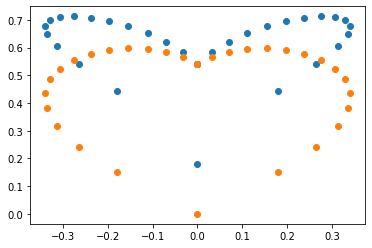

In [187]:
np.array(a).shape
plt.plot(a[0], a[1], "o")
plt.plot( b[0], b[1], "o")

In [188]:
data = np.array([np.array(a).T, np.array(b).T])[:,:-1,:]
print(data.shape)

# data = np.concatenate((data[:-1], data[:-1]), axis=1)
# empty array
data_conc = data
for i in range(3):
    data_conc = np.concatenate((data_conc, data), axis=1)

data_conc.shape

(2, 30, 2)


(2, 120, 2)

In [120]:
30*4

120

In [189]:
# save data
np.save("./robot_data/heart_data.npy", data_conc)

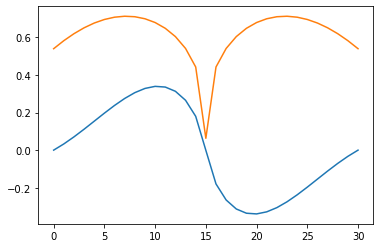

In [105]:
plt.plot(a[0])
plt.plot(a[1])

In [94]:
import matplotlib.pyplot as plt

def plot_heart_data(a, b):
    time_a = a[0]
    time_b = b[0]
    x_a = a[1]
    x_b = b[1]
    exp = 0.3
    
    plt.plot(time_a, x_a, c=time_a, cmap='coolwarm')
    plt.plot(time_b, x_b, c=time_b, cmap='coolwarm')
    plt.colorbar()
    plt.xlabel('Time')
    plt.ylabel('X')
    plt.title('Heart Data')
    plt.show()

# Preprocessing with powerpoint cleaning

In [2]:
l_robot = "M2754.71 197.68C2744.56 198.552 2732.95 199.824 2721.98 208.046 2711 216.269 2694.08 234.459 2688.84 247.018 2683.6 259.577 2687 274.428 2690.54 283.401 2694.07 292.374 2703.56 291.157 2710.07 300.852 2716.58 310.547 2727.43 329.453 2729.59 341.571 2731.76 353.689 2731.58 367.976 2723.09 373.564 2714.59 379.152 2684.13 374.824 2678.6 375.097 2645 376.766 2639.54 378.411 2605.91 379.381 2598.41 380.499 2565.68 376.411 2553.91 383.823 2542.15 391.235 2539.12 412.476 2535.31 423.855 2531.49 435.233 2530.67 435.269 2531.04 452.093 2531.42 468.918 2537.01 491.842 2537.55 524.805 2538.1 557.768 2535.39 608.181 2534.3 649.87 2537.01 676.531 2540.59 677.906 2547.64 686.147 2554.69 694.388 2561.48 696.15 2576.61 699.314 2591.75 702.478 2624.95 704.269 2638.46 705.131 2656.66 699.711 2642.24 702.561 2671.01 705.131 2685.08 706.389 2699.22 707.07 2713.32 708.04 2717.66 709.978 2723.63 708.04 2726.34 713.857 2729.05 719.674 2731.76 735.186 2729.59 742.942 2727.43 750.697 2717.76 758.126 2713.32 760.392 2707.3 763.467 2674.46 766.187 2674.26 766.209 2664.5 765.24 2656.61 764.271 2644.97 763.301 2633.33 762.331 2608.9 760.392 2604.43 760.392 2574.03 760.392 2571.19 762.331 2540.81 763.301 2531.04 762.331 2521.34 760.392 2511.52 760.392 2505.98 760.392 2499.61 760.533 2495.24 763.301 2490.87 766.069 2487.2 773.012 2485.29 776.997 2480.92 786.11 2484.17 790.652 2482.22 801.111 2481.14 820.501 2486.29 826.43 2482.41 845.531 2481.71 848.969 2477.91 862.321 2469.2 865.098 2460.49 867.875 2443.18 862.966 2430.14 862.189 2410.63 861.027 2391.08 860.251 2371.55 859.281 2361.03 861.161 2346.4 861.448 2339 859.281 2331.61 857.113 2330.43 850.15 2327.18 846.272 2323.92 839.485 2320.56 836.497 2319.48 818.562 2320.56 792.386 2320.96 766.18 2322.73 740.033 2322.96 736.61 2325.99 715.654 2329.24 708.04 2332.5 700.425 2336.29 698.706 2342.26 694.344 2348.23 689.981 2353.88 691.839 2365.04 681.863 2372.51 661.853 2377.95 659.194 2381.32 652.779 2384.69 646.363 2383.73 646.108 2385.26 643.366 2388.09 638.309 2391.08 634.358 2394.34 629.511 2398.21 612.214 2401.85 603.111 2394.34 582.975 2392.4 577.772 2386.81 573.794 2381.32 571.341 2373.32 567.766 2355.28 565.524 2355.28 565.524 2345.37 571.428 2341.81 572.152 2335.75 582.975 2332.68 588.459 2329.24 600.426 2329.24 600.426 2328.76 605.129 2331.61 633.554 2319.48 641.145 2311.53 646.118 2293.44 652.779 2293.44 652.779 2286.93 651.809 2280.17 651.735 2273.91 649.87 2270.2 648.765 2266.91 646.525 2264.14 644.053 2253.82 634.831 2253.22 629.824 2247.87 617.877 2246.78 612.06 2245.48 606.271 2244.61 600.426 2243.31 591.723 2245.75 582.101 2241.36 574.25 2239.36 570.675 2232.72 572.125 2228.34 571.341 2221.87 570.185 2215.21 569.863 2208.81 568.433 2202.15 566.945 2189.28 562.616 2189.28 562.616 2186.88 570.107 2179.11 591.503 2179.51 600.426 2180.34 618.934 2182.62 637.417 2186.02 655.687 2186.98 660.836 2189.44 665.803 2192.53 670.229 2194.97 673.717 2197.25 675.395 2202.3 678.955 2207.35 682.515 2211.21 684.667 2222.83 691.593 2223.92 694.502 2234.32 712.492 2237.1 724.381 2239.87 736.27 2238.77 750.989 2239.48 762.931 2240.19 774.873 2240.27 791.188 2241.36 796.035 2242.44 820.273 2243.06 832.155 2244.61 856.372 2245.23 866.1 2244.21 875.304 2247.87 885.457 2251.53 895.611 2258.11 910.231 2266.58 917.291 2275.04 924.352 2287.67 924.888 2298.65 927.823 2309.64 930.757 2321.43 933.236 2332.5 934.901 2343.56 936.566 2354.19 936.84 2365.04 937.81 2388.85 943.129 2390.24 941.529 2403.18 940.559 2416.12 939.589 2430.92 931.967 2442.66 931.993 2454.4 932.019 2466.59 933.914 2473.65 940.718 2480.7 947.522 2482.8 969.911 2484.97 972.819 2483.25 983.766 2477.8 999.875 2475.71 1010.52 2473.63 1021.17 2473.54 1027.97 2472.46 1036.7 2473.54 1054.15 2472.58 1054.47 2475.71 1089.05 2478.84 1123.63 2493.79 1212.53 2491.26 1244.19 2488.72 1275.86 2472.29 1269.98 2460.48 1279.03 2448.67 1288.07 2430.32 1293.77 2420.38 1298.46 2410.44 1303.15 2408.99 1304.28 2400.85 1307.19 2392.71 1310.1 2371.55 1315.91 2371.55 1315.91 2363.55 1323.07 2359 1326.76 2352.02 1336.27 2345.05 1345.78 2332.98 1355.52 2329.73 1372.97 2326.47 1390.42 2330.95 1426.25 2332.5 1440.98 2334.04 1455.71 2336.51 1454.64 2339 1461.34 2343.77 1474.11 2345.5 1477.53 2355.28 1487.51 2359.32 1491.64 2364.3 1494.98 2368.3 1499.15 2377.63 1508.87 2371.73 1508.25 2384.57 1516.6 2394.64 1523.14 2412.81 1532.14 2423.63 1536.96 2434.46 1541.78 2443.87 1544.26 2449.54 1545.52 2464.16 1548.79 2482.2 1547.6 2508.26 1548.59L2605.91 1551.5C2630.86 1551.02 2631.41 1546.65 2657.99 1545.68 2684.57 1544.71 2737.73 1546.65 2765.4 1545.68 2793.07 1544.71 2804.46 1541.8 2823.99 1539.87 2908.16 1543.45 2909.3 1545.03 3009.52 1539.87 3026.98 1538.97 3044.24 1535.99 3061.6 1534.05 3076.79 1534.05 3089.26 1539.87 3100.66 1539.87 3112.05 1539.87 3126.18 1535.17 3129.95 1534.05 3145.25 1529.49 3164.13 1525.32 3175.52 1519.51 3186.91 1513.69 3192.34 1505.93 3198.3 1499.15 3204.27 1492.36 3204.97 1490.15 3211.32 1478.79 3216.11 1427.44 3216.6 1439.5 3211.32 1371.17 3210.69 1363.03 3205.94 1354.76 3201.56 1347.91 3199.62 1344.87 3197.59 1341.83 3195.05 1339.18 3191.05 1335.02 3186.62 1331.19 3182.03 1327.55 3176.84 1323.42 3171.65 1319.2 3165.75 1315.91 3162.85 1314.29 3159.39 1313.41 3155.99 1313 3143.04 1311.46 3129.95 1311.07 3116.93 1310.1 3112.59 1309.13 3108.31 1307.9 3103.91 1307.19 3096.36 1305.96 3095.47 1306.5 3081.13 1304.28 3066.78 1302.06 3032.67 1297.56 3017.83 1293.86 3002.98 1290.16 2998.32 1286.63 2992.05 1282.07 2985.79 1277.5 2983.82 1271.98 2980.22 1266.47 2976.63 1260.96 2973.72 1257.76 2970.46 1249.02 2971.54 1243.2 2969.05 1235.74 2973.71 1231.57 2979.3 1226.58 2988.87 1227.57 2996.5 1225.75 3020.05 1220.14 3018.62 1220.63 3038.81 1217.02 3040.98 1214.12 3043.57 1211.42 3045.32 1208.3 3047.66 1204.13 3050.79 1191.67 3051.83 1187.94 3050.75 1168.55 3050.24 1149.13 3048.58 1129.77 3048.07 1123.89 3045.32 1118.22 3045.32 1112.32 3045.32 1095.81 3047.49 1079.36 3048.58 1062.87 3049.66 1027.97 3050.24 993.055 3051.83 958.169 3052.09 952.486 3052.04 921.091 3057.47 912.85 3062.89 904.609 3075.56 910.382 3084.38 908.725 3093.21 907.068 3110.42 902.908 3110.42 902.908 3126.24 903.996 3160.02 902.231 3175.52 914.542 3180.73 918.679 3184.06 938.164 3185.28 943.627 3184.54 961.603 3186.05 1025.92 3175.52 1054.15 3173.8 1058.75 3168.63 1061.67 3165.75 1065.78 3163.18 1069.46 3165.26 1070.46 3159.24 1077.42 3153.22 1084.37 3136.14 1100.23 3129.63 1107.51 3123.12 1114.78 3122.84 1117.33 3120.19 1121.04 3117.53 1124.75 3116.39 1123.47 3113.68 1129.77 3110.96 1136.07 3104.45 1148.19 3103.91 1158.85 3109.57 1179.07 3106.07 1164.58 3110.42 1193.76 3111.83 1203.21 3110.64 1215.73 3120.19 1222.84 3123.91 1225.62 3128.86 1226.72 3133.2 1228.66 3136.46 1226.72 3138.03 1226.03 3142.97 1222.84 3147.9 1219.65 3152.52 1212.58 3162.82 1209.51L3178.77 1202.48C3175.52 1195.7 3175.06 1193.25 3172.45 1186.25 3170.7 1181.56 3166.72 1172.74 3165.75 1167.58 3164.78 1162.42 3167.71 1159.14 3166.63 1155.26 3172.05 1151.38 3172.37 1146.7 3176.02 1142.94 3179.67 1139.17 3183.2 1135.84 3188.54 1132.68 3193.88 1129.51 3200.13 1126.32 3208.07 1123.95 3214.58 1124.92 3221.06 1126.03 3227.6 1126.86 3236.26 1127.97 3245.67 1126.53 3253.64 1129.77 3258.58 1131.78 3260.15 1137.53 3263.4 1141.4 3264.49 1145.28 3266.74 1153.81 3265.28 1163.35 3263.82 1172.89 3258.65 1187.88 3254.64 1198.62 3259.99 1210.57 3270.62 1205.23 3276.42 1208.3 3282.22 1211.37 3285.32 1213.87 3289.44 1217.02 3292.94 1219.7 3295.95 1222.84 3299.21 1225.75 3303.55 1224.78 3309.06 1225.67 3312.23 1222.84 3315.39 1220.02 3314.25 1215.05 3315.48 1211.21 3316.42 1208.26 3317.65 1205.39 3318.74 1202.48 3319.82 1195.7 3320.49 1188.85 3321.99 1182.12 3322.66 1179.12 3324.16 1179.94 3325.25 1173.4 3326.33 1166.86 3327.41 1148.7 3328.5 1142.88 3325.77 1128.24 3325.03 1122.67 3322.86 1116.6 3320.69 1110.54 3317.8 1110.12 3315.48 1106.5 3313.16 1102.88 3313.48 1100.48 3308.97 1094.87 3304.46 1089.25 3303.79 1080.3 3288.44 1072.82 3282.41 1069.88 3269.54 1065.62 3263.4 1062.87L3250.38 1057.06C3249.3 1040.58 3250.34 1030.92 3248.5 1014.49 3248.16 1011.44 3244.1 1011.67 3243.87 998.888 3243.64 986.108 3246.04 958.169 3247.13 937.81 3245.87 929.943 3241.93 900.302 3237.36 894.183 3225.43 878.186 3237.36 891.759 3221.09 879.64 3217.55 877.007 3215.32 872.955 3211.32 870.915 3207.44 868.932 3203.13 868.976 3198.3 868.006 3193.47 867.036 3185.74 865.564 3182.35 865.098 3171.57 863.616 3164.72 863.644 3155.99 862.189 3147.26 860.735 3140.9 859.635 3129.95 856.372 3116.93 857.342 3103.96 859.281 3090.89 859.281 3085.36 859.281 3079.42 858.825 3074.62 856.372 3071.22 854.638 3069.7 850.842 3068.11 847.647 3063.58 838.542 3061.05 828.231 3058.34 818.562 3059.21 810.831 3065.23 785.701 3058.34 774.935 3055.37 770.292 3043.82 767.703 3038.81 766.209 3023.79 768.895 3005.79 771.427 2993.24 772.026 2980.7 772.625 2966.93 770.185 2963.53 769.805 2949.76 768.267 2898.86 763.847 2889.09 763.301 2882.58 762.331 2875.59 762.788 2869.56 760.392 2861.07 757.024 2856.88 746.468 2853.28 740.033 2855.45 731.308 2849.63 725.693 2852.22 720.732 2854.82 715.77 2862.63 712.862 2868.87 710.261 2875.1 707.661 2879.2 706.955 2889.64 705.131 2900.08 703.307 2930.14 699.398 2931.53 699.314L2958.45 693.497C2968.19 690.589 2982.02 689.135 2989.99 681.863 2991.58 679.022 3005.71 654.974 3006.26 649.87 3008.98 624.762 3008.43 599.456 3009.52 574.25 3003.15 540.133 3007.76 568.341 3003.01 513.171 2999.99 478.06 3004.84 490.27 2993.24 469.544 2992.21 460.291 2991.77 432.65 2990.86 420.787 2989.95 408.924 2992.28 403.327 2987.79 398.365 2983.31 393.404 2973.89 392.725 2963.95 391.015 2954.01 389.305 2940.06 389.228 2928.15 388.107 2919.45 387.288 2910.79 386.168 2902.11 385.198 2888.54 384.228 2860.33 384.228 2846.77 382.29 2833.21 380.351 2829.33 376.638 2820.73 373.564 2817.87 369.732 2808.11 357.422 2807.71 353.205 2805.83 333.05 2811.51 330.907 2814.22 321.211 2816.94 311.516 2820.19 306.185 2823.99 295.035 2827.78 283.886 2832.77 273.27 2837.01 254.316 2836.52 251.678 2836.27 227.999 2827.24 219.415 2818.22 210.83 2794.95 206.432 2782.87 202.81 2770.78 199.188 2764.86 196.807 2754.71 197.68Z"
l_human = "M1150.48 101.5 1150.48 101.5C1136.89 102.545 1123.25 103.012 1109.72 104.635 1097.09 106.15 1072.08 110.905 1072.08 110.905 1067.9 112.996 1063.81 115.277 1059.54 117.176 1048.29 122.174 1044.8 123.134 1034.45 126.581 1024.54 136.491 1021.43 138.904 1012.5 151.663 1009.01 156.655 1006.05 162.012 1003.09 167.338 1000.82 171.424 998.3 175.445 996.821 179.879 990.773 198.02 990.04 208.528 987.414 226.906 992.085 245.585 991.35 233.11 987.414 248.853 986.12 254.022 987.234 260.095 984.278 264.528 982.444 267.279 978.048 266.756 974.87 267.664 960.084 271.887 958.14 271.397 940.374 273.934 930.511 277.221 928.27 276.41 921.558 286.475 919.725 289.225 919.468 292.745 918.422 295.88 924.046 329.612 919.669 300.831 924.694 346.043 925.625 354.416 923.865 363.69 927.83 371.124 932.928 380.68 949.634 395.534 962.326 399.341 968.416 401.167 974.87 401.431 981.142 402.476 984.278 405.611 988.714 407.845 990.549 411.881 994.117 419.727 994.095 428.787 996.821 436.963 997.867 440.098 998.797 443.274 999.957 446.368 1001.93 451.638 1003.71 457.01 1006.23 462.044 1018.06 485.695 1011.96 469.716 1021.91 487.125 1023.86 490.536 1030.43 505.855 1034.45 509.071 1037.03 511.136 1040.72 511.161 1043.86 512.206 1044.91 516.387 1045.07 520.893 1047 524.747 1049.33 529.421 1054.46 532.436 1056.4 537.288 1058.77 543.19 1058.5 549.828 1059.54 556.099 1058.21 578.635 1063.82 602.782 1050.13 621.937 1043.81 630.792 1037.96 633.423 1028.18 637.613 1025.14 638.915 1021.98 639.947 1018.77 640.748 1013.6 642.041 1008.3 642.727 1003.09 643.883 978.941 649.249 998.292 647.362 959.19 650.154 940.393 651.496 921.543 651.993 902.743 653.289 891.224 654.083 879.746 655.379 868.247 656.424 860.745 661.424 854.919 664.419 849.431 672.1 846.714 675.903 845.25 680.46 843.159 684.641 841.261 696.029 838.32 716.976 835.814 724.493L831.303 746.271C830.258 753.586 833.343 764.931 827.48 766.155 821.616 767.378 805.9 756.456 796.12 753.614 786.34 750.773 781.345 750.15 768.801 749.105 765.665 748.06 752.975 748.59 742.894 749.406 732.812 750.222 729.153 756.985 708.313 754 703.577 730.326 702.564 711.354 702.041 697.181 701.519 683.009 704.132 678.37 705.177 668.965 706.223 644.928 705.995 620.803 708.313 596.856 709.144 588.278 709.804 578.945 714.585 571.775L720.857 562.369C722.61 555.359 727.211 535.598 730.265 531.017 734.446 524.747 740.425 519.356 742.809 512.206 743.854 509.071 745.037 505.979 745.945 502.801 748.897 492.47 750.061 485.359 752.217 474.585 752.206 474.523 748.024 446.351 745.945 443.233 743.854 440.098 739.673 439.053 736.537 436.963 730.265 438.008 721.101 436.977 717.721 440.098 714.341 443.219 721.167 453.026 716.262 455.689 711.357 458.352 696.928 470.838 688.292 456.075 688.168 453.72 697.273 402.221 695.383 387.017 693.494 371.814 682.18 369.034 676.954 364.854L655.002 367.989 629.914 371.124C623.62 372.023 617.37 373.214 611.098 374.259 606.917 378.439 602.103 382.071 598.555 386.8 595.75 390.539 594.875 395.452 592.283 399.341 588.57 404.908 583.92 409.791 579.739 415.016 565.7 457.122 579.739 411.404 579.739 524.747 579.739 543.587 577.648 562.369 576.603 581.18 577.648 638.658 577.97 696.154 579.739 753.614 579.917 759.384 583.321 793.918 586.011 803.777 587.492 809.206 590.665 814.062 592.283 819.453 593.814 824.557 594.466 829.886 595.419 835.128 598.499 852.066 597.531 851.923 601.691 866.48 602.598 869.658 603.524 872.848 604.827 875.886 608.709 884.942 610.494 891.36 620.506 894.697 626.539 896.707 633.05 896.787 639.322 897.832 660.898 890.641 664.782 893.473 673.818 891.561 682.854 889.65 690.251 886.71 693.538 886.364 710.204 884.611 716.676 886.336 733.401 885.291 776.265 878.148 772.078 880.13 783.576 879.021 795.075 877.911 796.12 879.68 802.392 878.635 808.141 880.202 812.323 885.227 818.072 888.426 823.821 891.626 828.525 897.832 836.888 897.832 845.25 897.832 861.235 890.179 868.247 888.426 877.132 887.904 883.927 891.561 890.199 894.697 896.471 897.832 900.652 903.057 905.879 907.237 920.114 930.958 911.963 913.926 918.422 935.454 920.322 941.784 923.608 947.745 924.694 954.265 925.74 960.535 926.288 966.909 927.83 973.076 929.434 979.488 934.102 991.887 934.102 991.887 933.057 1008.61 932.204 1025.34 930.966 1042.05 930.114 1053.56 928.421 1065.01 927.83 1076.54 926.331 1105.78 927.196 1135.15 924.694 1164.32 923.692 1176.01 916.207 1190.79 912.151 1201.94 908.762 1211.26 905.879 1220.75 902.743 1230.16L899.607 1239.56C898.561 1242.7 897.119 1245.73 896.471 1248.97 895.425 1254.2 895.02 1259.59 893.335 1264.65 891.857 1269.08 888.799 1272.85 887.063 1277.19 884.608 1283.32 883.747 1290.09 880.791 1296 878.7 1300.18 876.418 1304.27 874.519 1308.54 864.845 1330.3 870.991 1317.16 865.111 1336.75 863.211 1343.09 857.335 1351.91 858.839 1355.57 860.343 1359.22 869.874 1358.05 874.133 1358.7 883.489 1360.14 896.929 1359.22 899.607 1361.84 902.284 1364.45 892.969 1369.95 890.199 1374.38 883.315 1385.39 884.792 1385.66 880.791 1396.32 878.815 1401.59 876.61 1406.77 874.519 1412 873.494 1418.14 870.125 1439.6 868.247 1446.49 866.508 1452.86 863.714 1458.92 861.975 1465.3 860.573 1470.44 860.038 1475.78 858.839 1480.97 856.901 1489.37 852.567 1506.05 852.567 1506.05 851.522 1517.55 850.78 1529.08 849.431 1540.54 848.688 1546.85 846.295 1552.99 846.295 1559.35 846.295 1599.69 848.705 1608.05 852.567 1640.87 854.339 1655.92 854.246 1667.85 858.839 1681.62 861.993 1691.08 869.721 1708.12 874.519 1716.11 898.945 1756.81 870.666 1702.14 890.199 1741.19 891.244 1747.46 891.661 1753.87 893.335 1760 894.816 1765.43 897.826 1770.34 899.607 1775.68 900.97 1779.77 901.697 1784.04 902.743 1788.22 903.788 1798.67 906.228 1809.07 905.879 1819.57 903.224 1899.19 900.105 1858.97 893.335 1919.9 889.268 1956.49 891.373 1938.72 887.063 1973.19 893.44 2005.07 889.554 1974.01 887.063 2001.41 877.662 2104.8 892.584 2062.85 874.519 2108.01 873.474 2132.04 872.615 2156.09 871.383 2180.11 870.525 2196.85 871.002 2213.75 868.247 2230.28 866.779 2239.08 861.504 2246.84 858.839 2255.36 856.268 2263.58 858.381 2271.33 852.567 2280.44 846.754 2289.55 836.469 2301.69 823.958 2310.03 815.765 2326.41 813.648 2332.37 808.193 2340.09 802.738 2347.82 794.359 2353.24 791.224 2356.37 801.677 2360.55 810.047 2369 826.02 2370.97 841.993 2372.95 864.788 2369.94 887.063 2368.22 896.471 2369.27 905.904 2370.11 915.286 2371.36 921.589 2372.2 927.436 2374.38 934.102 2374.49 940.768 2374.61 950.055 2373.09 955.282 2372.05 979.324 2373.09 992.05 2372.55 1004.72 2372.43 1017.39 2372.32 1026.36 2373.63 1031.32 2371.36 1036.27 2369.09 1033.09 2362.91 1034.45 2358.82 1036.23 2353.48 1038.63 2348.37 1040.72 2343.14 1041.77 2333.74 1042.52 2324.29 1043.86 2314.93 1045.66 2302.34 1050.13 2277.3 1050.13 2277.3 1046.01 2240.23 1044.59 2241.93 1050.13 2195.79 1051.16 2187.23 1054.71 2179.16 1056.4 2170.71 1058.9 2158.24 1061.1 2145.7 1062.68 2133.09 1064.24 2120.6 1064.25 2107.95 1065.81 2095.46 1067.39 2082.85 1070.29 2070.43 1072.08 2057.84 1073.51 2047.9 1076.4 2015.29 1078.36 2004.54 1078.95 2001.29 1080.45 1998.27 1081.49 1995.14 1082.54 1987.82 1084.63 1980.58 1084.63 1973.19 1084.63 1961.86 1082.91 1922.42 1078.36 1904.22 1076.75 1897.81 1074.18 1891.68 1072.08 1885.41 1069.28 1862.94 1065.81 1838.85 1065.81 1816.44 1065.81 1806.97 1067.9 1797.62 1068.95 1788.22 1070 1768.31 1071.12 1725.04 1075.22 1700.43 1076.8 1690.93 1079.6 1681.66 1081.49 1672.22 1083.78 1660.76 1085.23 1649.14 1087.76 1637.73 1091.27 1621.96 1097.49 1605.58 1103.44 1590.7 1108.53 1578 1113.91 1564.22 1122.26 1553.08 1124.92 1549.53 1129.09 1547.28 1131.67 1543.68 1134.38 1539.87 1133.66 1533.52 1137.94 1531.14 1142.22 1528.75 1153.18 1530.42 1157.36 1529.37 1206.43 1549 1172.54 1535.02 1178.71 1537.41 1184.88 1539.79 1189.16 1541.59 1194.39 1543.68 1209.17 1565.84 1190.62 1538.4 1210.07 1565.62 1212.26 1568.69 1214.25 1571.89 1216.34 1575.03 1220.04 1593.54 1223.89 1609.76 1225.75 1628.33 1227.1 1641.88 1227.68 1655.51 1228.88 1669.08 1232.57 1710.92 1231.58 1720.39 1238.29 1750.6 1239.23 1754.8 1239.91 1759.1 1241.43 1763.14 1243.07 1767.51 1245.61 1771.5 1247.7 1775.68 1248.74 1781.95 1250.83 1788.13 1250.83 1794.49 1250.83 1835.62 1248.65 1820.53 1244.56 1847.79 1228.56 1954.44 1244.46 1857.78 1235.15 1913.63 1236.46 1933.25 1242.99 2034.33 1244.56 2039.03L1253.97 2067.25C1258.6 2081.14 1262.64 2095 1269.65 2108.01 1273.22 2114.64 1282.19 2126.82 1282.19 2126.82 1283.24 2131 1284.56 2135.12 1285.33 2139.36 1286.65 2146.63 1287.25 2154.01 1288.47 2161.3 1289.34 2166.56 1290.56 2171.75 1291.6 2176.98 1292.65 2188.47 1294.04 2199.94 1294.74 2211.47 1296.13 2234.44 1296.17 2257.49 1297.87 2280.44 1298.27 2285.75 1299.03 2291.17 1301.01 2296.12 1303.27 2301.77 1307.69 2306.34 1310.42 2311.79 1315.47 2321.89 1319.26 2338.3 1329.23 2346.28 1337.9 2353.21 1355.5 2361.3 1366.86 2365.09 1370.95 2366.45 1375.23 2367.18 1379.41 2368.22L1407.63 2365.09C1486.15 2357.49 1453.01 2363.54 1492.3 2355.68 1499.62 2356.73 1506.86 2358.82 1514.25 2358.82 1519.58 2358.82 1524.68 2356.56 1529.93 2355.68 1537.23 2354.47 1544.57 2353.59 1551.89 2352.55 1554.21 2351.77 1570.7 2347.19 1570.7 2343.14 1570.7 2333.15 1558.2 2313.91 1548.75 2308.66 1544.09 2306.07 1541.15 2307.38 1533.07 2305.52 1524.99 2303.66 1527.73 2306.65 1500.25 2297.49 1497.12 2294.36 1490.67 2296.87 1486.03 2286.71 1481.39 2276.54 1476.42 2244.51 1472.41 2236.5 1477.04 2176.32 1476.44 2140.92 1476.62 2108.01 1476.8 2075.09 1475.86 2061.92 1473.49 2039.03 1472.7 2031.46 1469.22 2024.43 1467.22 2017.09 1466.08 2012.93 1464.92 2008.77 1464.08 2004.54 1462.83 1998.31 1461.84 1992.03 1460.94 1985.73 1459.75 1977.39 1459.57 1968.89 1457.81 1960.65 1456.42 1954.19 1453.14 1948.25 1451.54 1941.84 1449.99 1935.67 1449.94 1929.2 1448.4 1923.03 1446.8 1916.62 1443.94 1910.57 1442.13 1904.22 1428.63 1856.98 1444.13 1901.19 1426.45 1854.06 1425.57 1848.78 1420.18 1817.33 1420.18 1813.3 1420.18 1790.6 1420.85 1766.7 1426.45 1744.33 1427.25 1741.12 1428.68 1738.1 1429.58 1734.92 1430.77 1730.78 1430.97 1726.32 1432.72 1722.38 1435.2 1716.81 1438.99 1711.93 1442.13 1706.7 1443.17 1700.43 1443.88 1694.1 1445.26 1687.89 1445.98 1684.67 1447.53 1681.68 1448.4 1678.49 1450.67 1670.17 1452.58 1661.77 1454.67 1653.41L1457.81 1640.87C1458.85 1636.69 1460.1 1632.55 1460.94 1628.33L1464.08 1612.65C1466.98 1542.98 1466.59 1530.2 1464.08 1502.92 1461.57 1475.64 1453.18 1463.09 1449 1448.98 1447.96 1445.85 1442.75 1426.52 1438.99 1418.27 1435.23 1410.02 1430.97 1405.49 1426.45 1399.46 1423.31 1395.28 1419.67 1391.43 1417.04 1386.92 1398.55 1355.23 1411.94 1369.28 1401.36 1358.7L1423.31 1349.3C1429.58 1340.93 1440.08 1334.46 1442.13 1324.21 1443.52 1317.23 1431.32 1300.17 1426.45 1292.86 1423.35 1274.3 1421.55 1262.24 1417.04 1242.7 1414.01 1229.57 1411.86 1232.34 1404.5 1217.62 1389.15 1186.94 1406.48 1214.33 1391.95 1192.54 1389.86 1184.18 1390.85 1174.35 1385.68 1167.46 1370.02 1146.58 1381.99 1163.43 1366.86 1139.24 1364.87 1136.04 1362.28 1133.2 1360.59 1129.83 1345.25 1099.16 1362.58 1126.54 1348.05 1104.75 1345.29 1085.48 1341.22 1060.37 1341.78 1042.05 1342.41 1021.05 1345.81 1000.23 1348.05 979.346 1348.95 970.968 1350.25 962.638 1351.18 954.265 1352.34 943.826 1352.12 933.183 1354.32 922.913 1355.3 918.343 1358.27 914.43 1360.59 910.372 1366.12 900.704 1368.91 897.562 1379.41 891.561 1384.6 888.595 1400.53 886.085 1404.5 885.291 1417.31 886.572 1431.19 879.894 1443.7 872.75 1463.21 861.603 1461.73 865.958 1467.22 863.345 1472.7 860.732 1473.56 859.265 1476.62 857.075 1480.88 854.037 1484.63 850.261 1489.17 847.669 1492.67 845.67 1508.4 842.078 1511.12 841.399 1516.27 841.867 1546.97 842.876 1558.16 847.669 1561.62 849.154 1564.43 851.849 1567.57 853.939 1569.66 857.075 1571.65 860.279 1573.84 863.345 1576.88 867.597 1580.48 871.454 1583.25 875.886 1585.72 879.849 1587.43 884.246 1589.52 888.426 1590.56 893.652 1592.65 898.773 1592.65 904.102 1592.65 959.294 1593.4 968.962 1586.38 1007.56 1582.84 1027.06 1583.83 1021.48 1576.97 1042.05L1573.84 1051.45C1572.79 1058.77 1572.36 1066.2 1570.7 1073.4 1569.22 1079.84 1565.64 1072.06 1564.43 1092.21 1563.22 1112.36 1552.41 1150.19 1563.44 1194.3 1564.49 1198.48 1575.93 1197.76 1580.11 1198.81 1584.29 1197.76 1591.17 1176.26 1598.95 1172.3 1606.72 1168.34 1609.23 1163.34 1626.76 1175.02 1622.73 1203.18 1615.58 1235.08 1614.61 1248.97 1613.63 1262.86 1618.02 1255.92 1620.88 1258.38 1625.51 1262.34 1631.33 1264.65 1636.56 1267.78 1647.01 1266.74 1657.68 1267.01 1667.92 1264.65 1678.81 1262.13 1695.08 1234.89 1696.14 1233.29L1708.68 1214.48 1718.09 1183.13C1719.58 1176.69 1723.92 1170.92 1724.36 1164.32 1727.08 1123.64 1726.45 1082.81 1727.5 1042.05 1725.41 1029.51 1725.25 1016.49 1721.23 1004.43 1720.18 1001.29 1718.89 998.228 1718.09 995.022 1715.9 986.258 1713.22 968.921 1711.82 960.535 1710.77 944.859 1710.33 929.132 1708.68 913.508 1708.23 909.222 1706.26 905.217 1705.55 900.967 1704.16 892.656 1703.53 884.237 1702.41 875.886 1697.73 840.773 1702.1 865.375 1696.14 844.534 1694.96 840.391 1694.7 835.954 1693 831.993 1691.52 828.53 1688.92 825.654 1686.73 822.588 1680.21 813.458 1676.31 807.838 1667.92 800.642 1657.67 791.859 1655.89 792.055 1645.96 784.966 1629.47 773.184 1636.83 776.756 1617.74 766.155 1613.65 763.885 1609.68 761.227 1605.2 759.884 1599.11 758.058 1592.62 757.996 1586.38 756.749 1576.54 754.781 1573.4 753.467 1564.43 750.479 1555.02 751.524 1547.21 753.715 1536.21 753.614 1525.2 753.514 1508.05 753.795 1498.38 749.877 1488.71 745.958 1484.43 737.576 1478.19 730.1 1471.95 722.625 1466.43 715.731 1460.94 705.019 1455.46 694.308 1449.44 672.883 1445.26 665.83 1441.08 658.776 1439.03 663.602 1435.86 662.694 1431.71 661.51 1427.4 660.922 1423.31 659.559 1390.76 648.71 1421.27 658.539 1398.22 647.019 1395.27 645.541 1391.85 645.185 1388.82 643.883 1384.52 642.043 1380.45 639.703 1376.27 637.613 1357.46 638.658 1338.67 640.748 1319.83 640.748 1314.49 640.748 1309.39 638.566 1304.15 637.613 1275.95 632.488 1294.97 636.888 1272.79 631.343 1250.28 616.342 1259.3 624.131 1244.56 609.397 1243.08 604.961 1238.29 591.387 1238.29 587.45 1238.29 582.121 1240.47 577.017 1241.43 571.775 1242.56 565.52 1243.86 559.282 1244.56 552.964 1245.95 540.457 1240.9 527.882 1247.7 515.342 1254.49 502.801 1275.22 490.26 1285.33 477.72 1295.43 465.179 1289.8 458.622 1308.33 440.098 1311.32 431.119 1307.98 419.719 1310.42 415.016 1312.86 410.314 1318.82 413.065 1322.96 411.881 1329.48 410.018 1339.77 406.334 1344.91 402.476 1349.64 398.928 1353.01 393.828 1357.46 389.935 1361.39 386.494 1365.82 383.665 1370 380.53 1372.09 376.349 1374.54 372.328 1376.27 367.989 1381.36 355.267 1382.6 348.956 1385.68 336.637 1384.89 332.668 1382.38 316.747 1379.41 311.556 1376.82 307.019 1373.7 302.71 1370 299.015 1367.34 296.351 1363.73 294.835 1360.59 292.745 1358.5 289.61 1356.99 286.004 1354.32 283.339 1349.89 278.908 1337.29 273.258 1332.37 270.799 1327.89 259.601 1326.88 251.204 1324.53 242.582 1322.18 233.961 1320.87 228.997 1318.26 219.069 1315.64 209.141 1313.55 192.42 1308.85 183.014 1304.15 173.609 1295.26 166.816 1290.03 162.636 1281.32 148.114 1267.3 136.771 1252.4 126.581 1237.51 116.392 1217.38 108.293 1200.66 101.5L1150.48 101.5Z"
L = [l_robot, l_human]
L_parsed = []
for l in L: 
    for i in ["M", "C", "Z", "L"]:
        l = l.replace(i, " ")
    # print(l.split(" "))

    l = [float(x) for x in l.split(" ") if x != '']
    L_parsed.append(l)

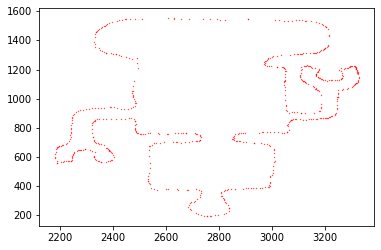

641 641


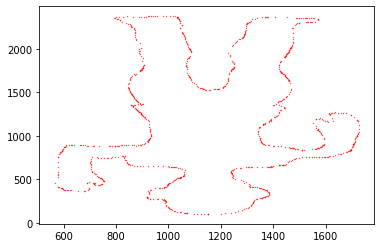

958 958


In [3]:
coord = []
for l in L_parsed:
    l_x = []
    l_y = []
    fig = plt.figure()
    for i in range(int(len(l)-1)):
        if i%2 == 0:
            plt.scatter(l[i], l[i+1], c = 'r', s= 0.1)
            l_x.append(l[i])
            l_y.append(l[i+1])
    plt.show()

    print(len(l_x), len(l_y))
    l_x.append(l_x[0])
    l_y.append(l_y[0])
    xs = np.linspace(0, 1, len(l_x))
    ys = np.stack((np.array(l_x), np.array(l_y)), axis=1)
    coord.append([xs,ys])

### Resampling

In [5]:
from scipy.interpolate import CubicSpline

ds/dx=-2114.4 ds/dy=281.3


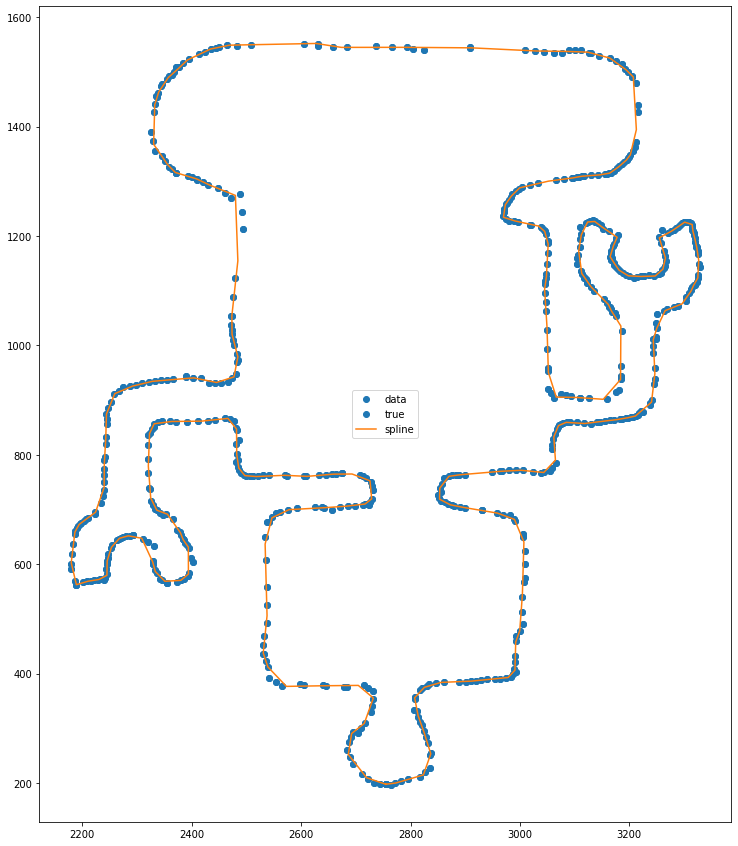

ds/dx=9392.1 ds/dy=-394.7


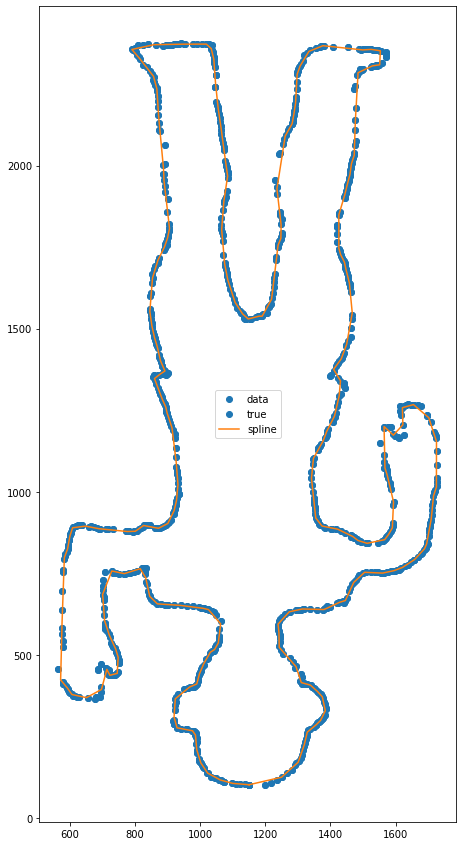

In [6]:
L_cs = []
coord_smooth = []
n_smooth = 200
for x, y in coord:
    cs = CubicSpline(x, y, bc_type='periodic')
    print("ds/dx={:.1f} ds/dy={:.1f}".format(cs(0, 1)[0], cs(0, 1)[1]))

    xs = np.linspace(0, 1, n_smooth)
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.plot(y[:, 0], y[:, 1], 'o', label='data')
    ax.scatter(y[:,0], y[:,1], label='true')
    ax.plot(cs(xs)[:, 0], cs(xs)[:, 1], label='spline')
    ax.axes.set_aspect('equal')
    ax.legend(loc='center')
    plt.show()
    L_cs.append(cs)
    coord_smooth.append([xs, cs(xs)])

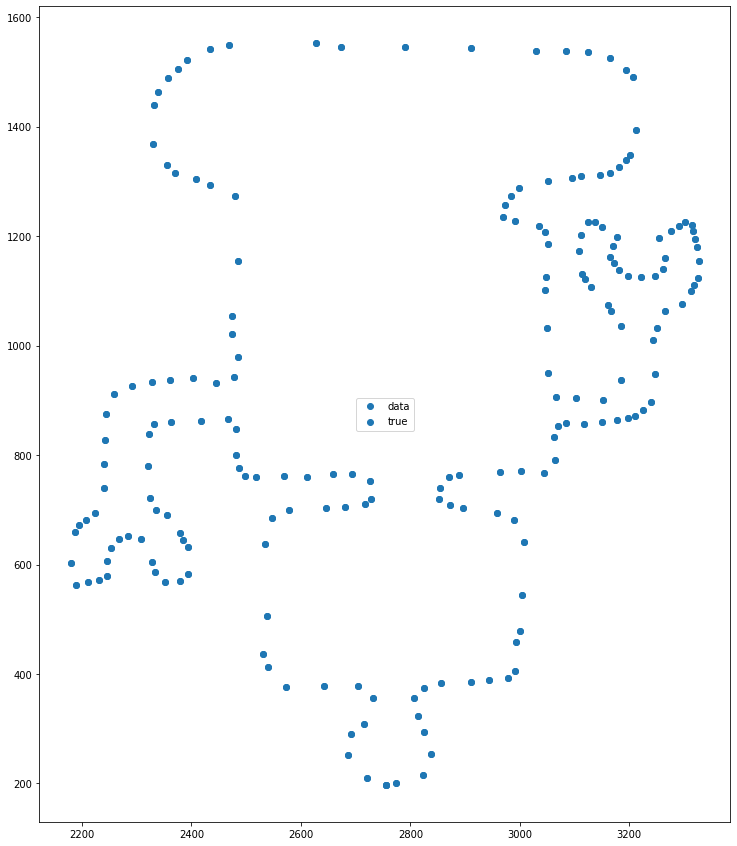

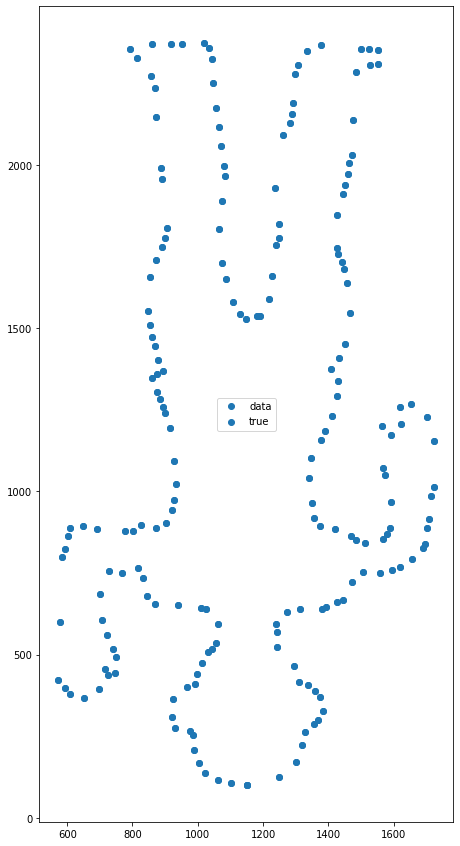

In [7]:
# plot coord smooth
for x, y in coord_smooth:
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.plot(y[:, 0], y[:, 1], 'o', label='data')
    ax.scatter(y[:,0], y[:,1], label='true')
    ax.axes.set_aspect('equal')
    ax.legend(loc='center')
    plt.show()

ds/dx=-3992.2 ds/dy=337.7


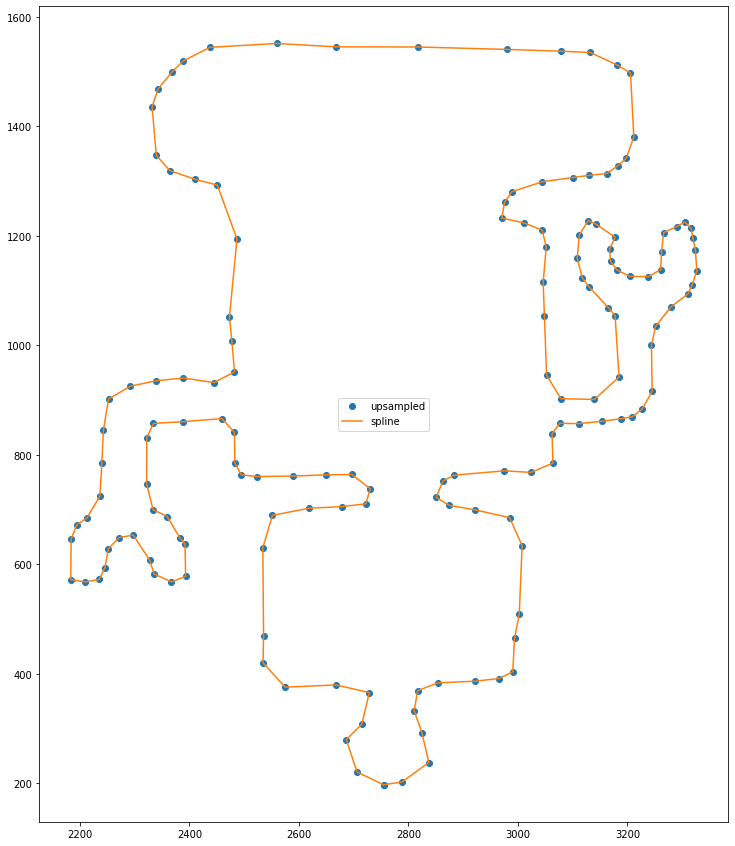

ds/dx=-16269.4 ds/dy=-1472.7


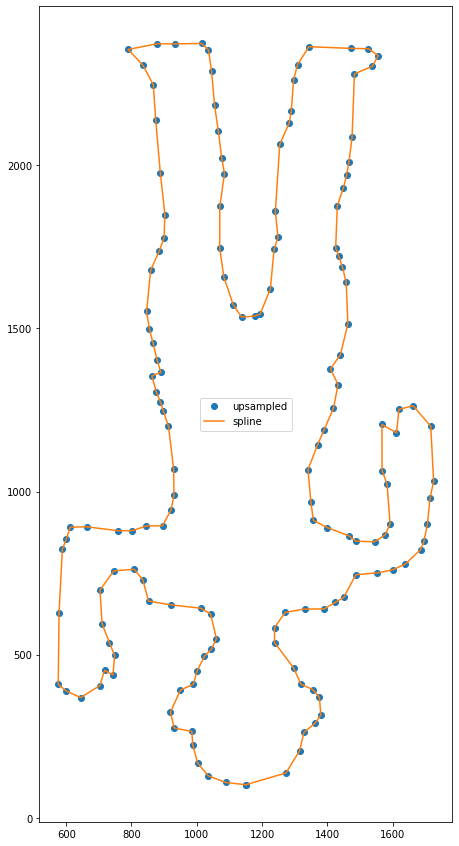

In [9]:
## upsample smooth coord

# fit a cubic spline
L_cs = []
L_coord_smooth = []
n_upsample = 151
l_data_raw = []
for x, y in coord_smooth:
    cs = CubicSpline(x, y, bc_type='periodic')
    print("ds/dx={:.1f} ds/dy={:.1f}".format(cs(0, 1)[0], cs(0, 1)[1]))

    xs = np.linspace(0, 1, n_upsample)
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.plot(cs(xs)[:, 0], cs(xs)[:, 1], 'o', label='upsampled')
    ax.plot(cs(xs)[:, 0], cs(xs)[:, 1], label='spline')
    ax.axes.set_aspect('equal')
    ax.legend(loc='center')
    plt.show()
    l_data_raw.append(cs(xs))
data_raw = np.array(l_data_raw)

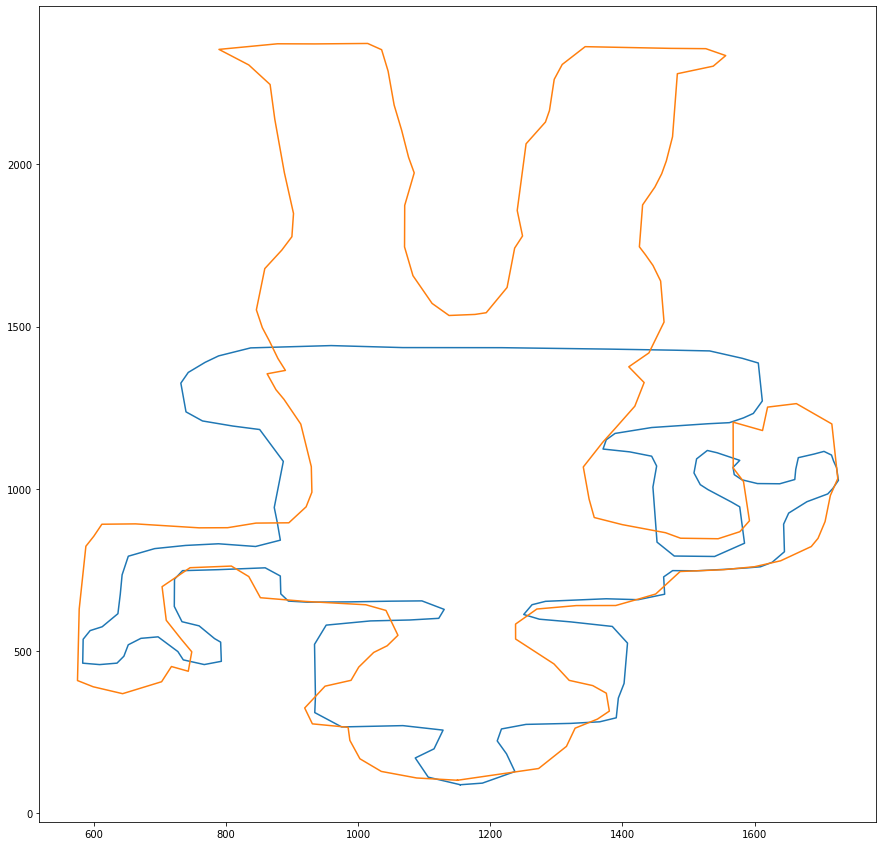

In [10]:
# check the shift
fig, ax = plt.subplots(figsize=(15, 15))
for i in range(len(data_raw)):
    if i == 0:
        shift_x = 1600
        shift_y = 110
    else:
        shift_x = 0
        shift_y = 0
    ax.plot(data_raw[i, :, 0]-shift_x, data_raw[i, :, 1]-shift_y, label='data')

In [7]:
# open file
import numpy as np
params = np.load("logs/human_robot_pp_wout/ckpt/params_001.npz")

In [8]:
params = {key: params[key] for key in params.keys()}

In [9]:
for i in params.keys():
    print(i, params[i].shape)

a_dt (3,)
bias (3,)
bias0 (3,)
bias1 (3,)
bias_out (2,)
bias_out0 (2,)
bias_out1 (2,)
mlp_0_l0_b (512,)
mlp_0_l0_w (512, 3)
mlp_0_l1_b (512,)
mlp_0_l1_w (512, 512)
mlp_0_l2_b (512,)
mlp_0_l2_w (512, 512)
mlp_0_l3_b (3,)
mlp_0_l3_w (3, 512)
mlp_1_l0_b (512,)
mlp_1_l0_w (512, 3)
mlp_1_l1_b (512,)
mlp_1_l1_w (512, 512)
mlp_1_l2_b (512,)
mlp_1_l2_w (512, 512)
mlp_1_l3_b (3,)
mlp_1_l3_w (3, 512)
w0 (3, 3)
w1 (3, 3)
win0 (3, 2)
win1 (3, 2)
wout (2, 512)
wout0 (2, 3)
wout1 (2, 3)
x_ini0 (3,)
x_ini1 (3,)


In [11]:
# remove last point
data_raw = data_raw[:,:-1,:]
# apply the shift
data_raw[0, :, 0] = data_raw[0, :, 0] - 1600
data_raw[0, :, 1] = data_raw[0, :, 1] - 110

In [104]:
data_raw.shape

(2, 1000, 2)

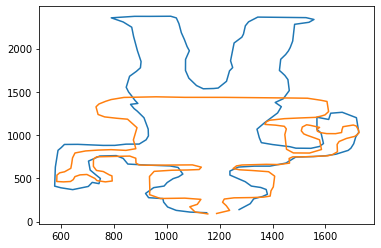

In [12]:
# re align the images
# data_raw[1,:,0] = data_raw[1,:,0] - 500
plt.plot(data_raw[1,:,0], data_raw[1,:,1])
plt.plot(data_raw[0,:,0], data_raw[0,:,1])

In [13]:
data1 = data_raw[0]
data2 = data_raw[1]

data1 = np.concatenate((data1, data1), axis=0)
for i in range(3):
    data1 = np.concatenate((data1, data1), axis=0)
data2 = np.concatenate((data2, data2), axis=0)
for i in range(3):
    data2 = np.concatenate((data2, data2), axis=0)

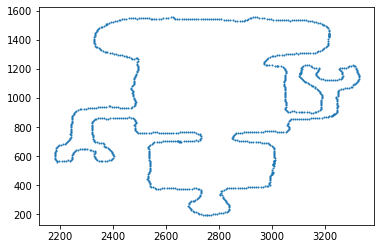

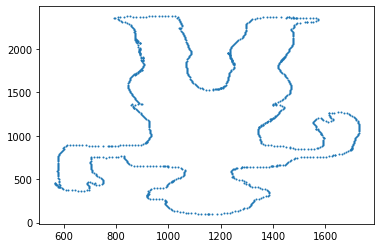

In [27]:
# bad
# for xs, ys in coord:
#     # Evaluate the spline function at points that are equally spaced in distance
#     tck, u = splprep([xs, ys[:, 0], ys[:, 1]], s=0)

#     u_samples = np.linspace(0, 1, n_samples)
#     x_samples, y_samples = splev(u_samples, tck)[1:]
#     # create an array out of x and y
#     data1 = np.stack([x_samples, y_samples], axis=1)

#     # Plot the sampled points
#     fig, ax = plt.subplots()
#     ax.scatter(x_samples, y_samples, s=1)
#     plt.show()

## Old preprocessing

In [3]:
with open('robot_data/robot_spline.pkl', 'rb') as f:
    cs_robot = pickle.load(f)

with open('robot_data/human_spline.pkl', 'rb') as f:
    cs_human = pickle.load(f)

# Re-sampling

In [10]:
n_samples = 1000
n = 200

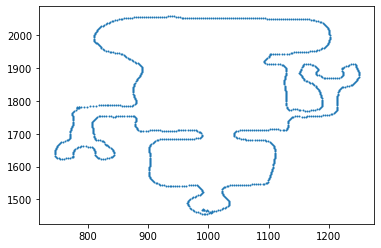

In [11]:
# Generate a parametric representation of the spline function
xs = np.linspace(0, 1, n)
ys = cs_robot(xs).reshape(-1, 2)  # reshape the output of cs_robot to have shape (n, 2)


# Evaluate the spline function at points that are equally spaced in distance
tck, u = splprep([xs, ys[:, 0], ys[:, 1]], s=0)

u_samples = np.linspace(0, 1, n_samples)
x_samples, y_samples = splev(u_samples, tck)[1:]
# create an array out of x and y
data1 = np.stack([x_samples, y_samples], axis=1)

# Plot the sampled points
fig, ax = plt.subplots()
ax.scatter(x_samples, y_samples, s=1)
plt.show()

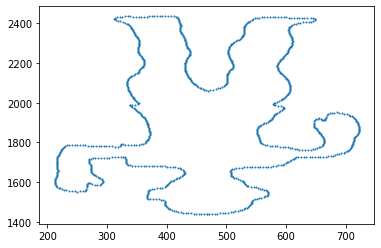

In [12]:
# Generate a parametric representation of the spline function
xs = np.linspace(0, 1, n)
ys = cs_human(xs).reshape(-1, 2)  # reshape the output of cs_robot to have shape (n, 2)


# Evaluate the spline function at points that are equally spaced in distance
tck, u = splprep([xs, ys[:, 0], ys[:, 1]], s=0)

u_samples = np.linspace(0, 1, n_samples)
x_samples, y_samples = splev(u_samples, tck)[1:]
# create an array out of x and y
data2 = np.stack([x_samples, y_samples], axis=1)

# Plot the sampled points
fig, ax = plt.subplots()
ax.scatter(x_samples, y_samples, s=1)
plt.show()

In [15]:
data1[:,0] = data1[:,0]- 550
data1 = np.concatenate((data1, data1), axis=0)
for i in range(3):
    data1 = np.concatenate((data1, data1), axis=0)
# data2 = cs_human(xs)[:-2]
data2 = np.concatenate((data2, data2), axis=0)
for i in range(3):
    data2 = np.concatenate((data2, data2), axis=0)

In [3]:
import jax.numpy as jnp
from jax import lax

def set_to_zero(x, threshold=3):
    return lax.cond(x > threshold, lambda x: x, lambda x: jnp.zeros_like(x), x)

x = jnp.array([1, 2, 3, 4, 5])
x = x.at[x>3].set(0)
threshold = 3
print(x)

[1 2 3 0 0]


In [1]:
import jax.numpy as jnp
from jax import jit, ops
import jax

@jit
def set_to_zero(x):
    return jax.lax.cond(x > 3, lambda x: x, lambda x: 0., x)

error_state_per_sample = jnp.array([0.1, 0.3, 0.5, 0.7, 0.9])
threshold = 0.2
error_state_per_sample = error_state_per_sample.at[2].apply(set_to_zero)
print(error_state_per_sample)

XlaRuntimeError: INVALID_ARGUMENT: computation region_0.16 cannot contain call/while op because it requires thread-local buffer allocations

In [2]:
jnp.where(error_state_per_sample > threshold, error_state_per_sample, jnp.zeros_like(error_state_per_sample))

Array([0. , 0.3, 0.5, 0.7, 0.9], dtype=float32)

In [1]:
print(data1.shape, data2.shape)
# plot the data
fig, ax = plt.subplots()
ax.scatter(data1[:, 0], data1[:, 1], s=1)
ax.scatter(data2[:, 0], data2[:, 1], s=1)
plt.show()

NameError: name 'data1' is not defined

# Re-scaling

In [14]:
data_concat = np.concatenate((data1, data2), axis=0)
scaler = MinMaxScaler(feature_range=(-1, 1))
data_concat_sc_sh = scaler.fit_transform(data_concat)

data1_sc_sh = data_concat_sc_sh[:data1.shape[0], :]
data2_sc_sh = data_concat_sc_sh[data1.shape[0]:, :]

data = np.stack((data1_sc_sh, data2_sc_sh), axis=0)
print(data.shape)

(2, 2400, 2)


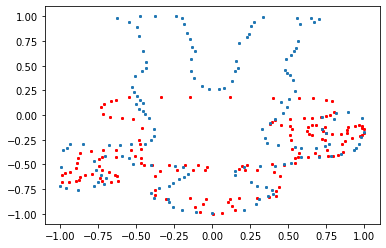

In [15]:
fig, ax = plt.subplots()
ax.scatter(data[0, :, 0], data[0, :, 1], s=1, c='r')
ax.scatter(data[1, :, 0], data[1, :, 1], s=1)

# Saving

In [23]:
# save the data with numpy
np.save('robot_data/robot_human_data_pp.npy', data)

In [24]:
# load the data
data = np.load('robot_data/robot_human_data.npy')
data.shape

(2, 6400, 2)